In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from scipy import stats

sns.set_style("darkgrid")
pd.options.mode.chained_assignment = None

In [2]:
path = 'C:/Users/delst/OneDrive - Queen Mary, University of London/Desktop/VSCode/Advanced_Projects/Uber_Demand_Project/data_archive/*.csv'
input_files = glob.glob(path)

In [3]:
def file_load(path):
        
    for i, file in enumerate(input_files):
        print(file)
        globals()[f'df{i+1}'] = pd.read_csv(input_files[i])
    print(f'Total number of data files loaded: {len(input_files)}')
    
file_load(path)

C:/Users/delst/OneDrive - Queen Mary, University of London/Desktop/VSCode/Advanced_Projects/Uber_Demand_Project/data_archive\uber.csv
Total number of data files loaded: 1


In [4]:
df_store = [eval(f'df{i+1}') for i in range(len(input_files))]   # Dataframe preperation

---

# **Initial Exploration**

In [5]:
keys_list = [df_store[i].keys() for i in range(len(df_store))]
flattened_list = [item for sublist in keys_list for item in sublist]
unique_keys = list(set(flattened_list))

print('Number of unique keys:', len(unique_keys))
# print(keys_list)
unique_keys

Number of unique keys: 9


['pickup_datetime',
 'Unnamed: 0',
 'pickup_longitude',
 'dropoff_latitude',
 'fare_amount',
 'pickup_latitude',
 'key',
 'passenger_count',
 'dropoff_longitude']

In [6]:
df = df_store[0]
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.describe().round()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.0,200000.0,200000.0,200000.0,199999.0,199999.0,200000.0
mean,27712504.0,11.0,-73.0,40.0,-73.0,40.0,2.0
std,16013822.0,10.0,11.0,8.0,13.0,7.0,1.0
min,1.0,-52.0,-1341.0,-74.0,-3357.0,-882.0,0.0
25%,13825346.0,6.0,-74.0,41.0,-74.0,41.0,1.0
50%,27745495.0,8.0,-74.0,41.0,-74.0,41.0,1.0
75%,41555301.0,12.0,-74.0,41.0,-74.0,41.0,2.0
max,55423567.0,499.0,57.0,1644.0,1154.0,873.0,208.0


In [8]:
# from sklearn.model_selection import StratifiedShuffleSplit

# X = df.drop('target_column', axis=1)
# y = df['target_column']

# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
# for train_index, test_index in sss.split(X, y):
#     df_sample = df.iloc[test_index]

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 42.1 MB


In [10]:
memory_usage = df.memory_usage(deep=True)
print(memory_usage/1000000)

Index                 0.000128
Unnamed: 0            1.600000
key                  16.936069
fare_amount           1.600000
pickup_datetime      16.000000
pickup_longitude      1.600000
pickup_latitude       1.600000
dropoff_longitude     1.600000
dropoff_latitude      1.600000
passenger_count       1.600000
dtype: float64


In [11]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
for col in df:
  print(df[col].unique())

[24238194 27835199 44984355 ... 27804658 20259894 11951496]
['2015-05-07 19:52:06.0000003' '2009-07-17 20:04:56.0000002'
 '2009-08-24 21:45:00.00000061' ... '2009-06-29 00:42:00.00000078'
 '2015-05-20 14:56:25.0000004' '2010-05-15 04:08:00.00000076']
[ 7.5   7.7  12.9  ... 37.2  86.25 89.1 ]
['2015-05-07 19:52:06 UTC' '2009-07-17 20:04:56 UTC'
 '2009-08-24 21:45:00 UTC' ... '2009-06-29 00:42:00 UTC'
 '2015-05-20 14:56:25 UTC' '2010-05-15 04:08:00 UTC']
[-73.99981689 -73.994355   -74.005043   ... -73.969204   -74.003548
 -73.99712372]
[40.73835373 40.728225   40.74077    ... 40.74391937 40.72121
 40.72545242]
[-73.99951172 -73.99471    -73.962565   ... -73.95223999 -74.01390839
 -73.858957  ]
[40.72321701 40.750325   40.772647   ... 40.692588   40.6954155
 40.768793  ]
[  1   3   5   2   4   6   0 208]


In [13]:
count = df['passenger_count'].eq(208).sum()
count

1

In [14]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [15]:
df = df[['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime','passenger_count']]
df

,Unnamed: 0,key,fare_amount,pickup_datetime,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,5
...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,1


---

# **Data Cleaning and Feature Engineering**

- Initial feature engineering will take place allowing us to later engineer our target variable
- Data cleaning will take place, including handling of NaNs and outlier removal
- Final feature engineering will take place, with the creation of our target variable PED

In [16]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).dt.tz_localize(None)
print((df.pickup_datetime.dtype))

datetime64[ns]


In [17]:
df['Label_Hour'] = df['pickup_datetime'].dt.hour
df['Label_Date'] = df['pickup_datetime'].dt.date
df['pickup_datetime'] = df['pickup_datetime'].dt.floor('H')
df['day_name'] = pd.to_datetime(df['pickup_datetime']).dt.day_name()
df['day_of_the_week'] = pd.to_datetime(df['pickup_datetime']).dt.weekday

In [18]:
df = df[(np.abs(stats.zscore(df['passenger_count'])) < 2)]
df = df[(np.abs(stats.zscore(df['fare_amount'])) < 2)]
df

,Unnamed: 0,key,fare_amount,pickup_datetime,passenger_count,Label_Hour,Label_Date,day_name,day_of_the_week
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:00:00,1,19,2015-05-07,Thursday,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:00:00,1,20,2009-07-17,Friday,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:00:00,1,21,2009-08-24,Monday,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:00:00,3,8,2009-06-26,Friday,4
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:00:00,1,2,2011-02-12,Saturday,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:00:00,1,10,2012-10-28,Sunday,6
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:00:00,1,1,2014-03-14,Friday,4
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:00:00,2,0,2009-06-29,Monday,0
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:00:00,1,14,2015-05-20,Wednesday,2


In [19]:
select_cols = ['pickup_datetime', 'fare_amount', 'passenger_count','Label_Date']
# Group the demand and price data by day using the pickup_datetime column to extract the date, and then use the pandas groupby() function to group the data by date.
dfh = df[select_cols].groupby('pickup_datetime').agg({'passenger_count':'mean','fare_amount':'mean'}).reset_index()
dfd = df[select_cols].groupby(['Label_Date'])['passenger_count','fare_amount'].agg({'passenger_count':'mean','fare_amount':'mean'}).reset_index()

display(dfh.describe(), dfd.describe())

C:\Users\delst\AppData\Local\Temp/ipykernel_56600/3314034989.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfd = df[select_cols].groupby(['Label_Date'])['passenger_count','fare_amount'].agg({'passenger_count':'mean','fare_amount':'mean'}).reset_index()


,passenger_count,fare_amount
count,49642.000000,49642.000000
mean,1.318290,9.714609
std,0.443541,3.744842
min,0.000000,-3.000000
25%,1.000000,7.220000
50%,1.166667,9.000000
75%,1.500000,11.416667
max,4.000000,31.100000


,passenger_count,fare_amount
count,2372.000000,2372.000000
mean,1.325536,9.646610
std,0.107412,0.984512
min,1.000000,6.732727
25%,1.250000,8.907859
50%,1.312500,9.558655
75%,1.388889,10.363672
max,1.795918,12.971864


In [20]:
# threshold_h_up = dfh.fare_amount_pct_change.quantile(0.1)
# threshold_h_low = dfh.fare_amount_pct_change.quantile(0.9)

# threshold_d_up = dfd.fare_amount_pct_change.quantile(0.1)
# threshold_d_low = dfd.fare_amount_pct_change.quantile(0.9)

# dfh[['fare_amount']] = dfh[['fare_amount']].apply(lambda x: x.clip(threshold_h_low, threshold_h_up))
# dfd[['fare_amount']] = dfd[['fare_amount']].apply(lambda x: x.clip(threshold_d_low, threshold_d_up))

In [21]:
dfh['passenger_count_pct_change'] = dfh['passenger_count'].pct_change()
dfh['fare_amount_pct_change'] = dfh['fare_amount'].pct_change()

dfd['passenger_count_pct_change'] = dfd['passenger_count'].pct_change()
dfd['fare_amount_pct_change'] = dfd['fare_amount'].pct_change()

display(dfh.describe(), dfd.describe())

,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change
count,49642.000000,49642.000000,49641.00,4.964100e+04
mean,1.318290,9.714609,inf,inf
std,0.443541,3.744842,NaN,NaN
min,0.000000,-3.000000,-1.00,-3.500000e+00
25%,1.000000,7.220000,-0.20,-2.654867e-01
50%,1.166667,9.000000,0.00,0.000000e+00
75%,1.500000,11.416667,0.25,3.643892e-01
max,4.000000,31.100000,inf,inf


,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change
count,2372.000000,2372.000000,2371.000000,2371.000000
mean,1.325536,9.646610,0.004670,0.004594
std,0.107412,0.984512,0.097827,0.095691
min,1.000000,6.732727,-0.342105,-0.320373
25%,1.250000,8.907859,-0.062096,-0.059002
50%,1.312500,9.558655,0.000000,-0.000973
75%,1.388889,10.363672,0.065242,0.064164
max,1.795918,12.971864,0.367532,0.382299


In [22]:
threshold_h_up = dfh.fare_amount_pct_change.quantile(0.1)
threshold_h_low = dfh.fare_amount_pct_change.quantile(0.9)

threshold_d_up = dfd.fare_amount_pct_change.quantile(0.1)
threshold_d_low = dfd.fare_amount_pct_change.quantile(0.9)

dfh[['fare_amount_pct_change']] = dfh[['fare_amount_pct_change']].apply(lambda x: x.clip(threshold_h_low, threshold_h_up))
dfd[['fare_amount_pct_change']] = dfd[['fare_amount_pct_change']].apply(lambda x: x.clip(threshold_d_low, threshold_d_up))

In [23]:
# dfh = dfh.replace([np.inf, -np.inf], np.nan)
# dfh['fare_amount_pct_change'] = dfh['fare_amount_pct_change'].replace(0.0, np.nan)
# dfh = dfh.dropna()
# dfh.describe()

In [24]:
dfh['PED_hour'] = (dfh.passenger_count_pct_change / dfh.fare_amount_pct_change)
dfd['PED_day'] = (dfd.passenger_count_pct_change / dfd.fare_amount_pct_change)
# dfg2['PED_week'] = (dfg2.passenger_count_sma_week_pct_change / dfg2.fare_amount_sma_week_pct_change)

dfh = dfh.iloc[1:,:].round(4)
dfd = dfd.iloc[1:,:].round(4)

In [25]:
dfh.replace([np.inf, -np.inf], np.nan, inplace=True)
dfh.bfill(inplace=True)
dfh.describe().round(2)

,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change,PED_hour
count,49641.00,49641.00,49641.00,49641.00,4.964100e+04
mean,1.32,9.71,0.08,0.08,-2.425861e+11
std,0.44,3.74,0.45,0.41,7.316591e+13
min,0.00,-3.00,-1.00,-0.46,-6.004800e+15
25%,1.00,7.22,-0.20,-0.27,-6.700000e-01
50%,1.17,9.00,0.00,0.00,0.000000e+00
75%,1.50,11.42,0.25,0.36,7.800000e-01
max,4.00,31.10,5.00,0.84,4.503600e+15


In [26]:
display(dfh.describe(),dfd.describe())

,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change,PED_hour
count,49641.000000,49641.000000,49641.00000,49641.000000,4.964100e+04
mean,1.318276,9.714588,0.07851,0.077742,-2.425861e+11
std,0.443535,3.744877,0.44845,0.412360,7.316591e+13
min,0.000000,-3.000000,-1.00000,-0.460600,-6.004800e+15
25%,1.000000,7.220000,-0.20000,-0.265500,-6.705000e-01
50%,1.166700,9.000000,0.00000,0.000000,0.000000e+00
75%,1.500000,11.416700,0.25000,0.364400,7.754000e-01
max,4.000000,31.100000,5.00000,0.835600,4.503600e+15


,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change,PED_day
count,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000
mean,1.325394,9.646648,0.004670,0.002710,0.382789
std,0.107205,0.984719,0.097826,0.076654,46.964160
min,1.000000,6.732700,-0.342100,-0.113000,-809.876500
25%,1.250000,8.906950,-0.062100,-0.059000,-1.018800
50%,1.312500,9.558100,0.000000,-0.001000,0.095500
75%,1.388900,10.363700,0.065250,0.064150,1.259400
max,1.795900,12.971900,0.367500,0.126900,2036.519000


In [27]:
def remove_outliers(df, column_name):
    
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (0.05 * iqr)
    upper_bound = q3 + (0.95 * iqr)
    return df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]

# To use the function on a specific column, pass the dataframe and the column name as arguments:
df = remove_outliers(dfh, 'PED_hour')
df



,pickup_datetime,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change,PED_hour
1,2009-01-01 02:00:00,1.80,8.9800,-0.1000,-0.1647,0.6073
2,2009-01-01 03:00:00,4.00,17.8000,1.2222,0.8356,1.4627
3,2009-01-01 04:00:00,1.25,9.8000,-0.6875,-0.4494,1.5297
4,2009-01-01 05:00:00,1.00,14.2000,-0.2000,0.4490,-0.4455
6,2009-01-01 11:00:00,1.00,4.5000,-0.5000,-0.4606,1.0855
...,...,...,...,...,...,...
49635,2015-06-30 17:00:00,1.00,15.5000,0.0000,0.6757,0.0000
49636,2015-06-30 18:00:00,1.00,11.8750,0.0000,-0.2339,-0.0000
49637,2015-06-30 19:00:00,1.00,11.1667,0.0000,-0.0596,-0.0000
49639,2015-06-30 21:00:00,2.00,10.5000,-0.2000,0.5273,-0.3793


In [28]:
display(dfh.describe(),dfd.describe())

,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change,PED_hour
count,49641.000000,49641.000000,49641.00000,49641.000000,4.964100e+04
mean,1.318276,9.714588,0.07851,0.077742,-2.425861e+11
std,0.443535,3.744877,0.44845,0.412360,7.316591e+13
min,0.000000,-3.000000,-1.00000,-0.460600,-6.004800e+15
25%,1.000000,7.220000,-0.20000,-0.265500,-6.705000e-01
50%,1.166700,9.000000,0.00000,0.000000,0.000000e+00
75%,1.500000,11.416700,0.25000,0.364400,7.754000e-01
max,4.000000,31.100000,5.00000,0.835600,4.503600e+15


,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change,PED_day
count,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000
mean,1.325394,9.646648,0.004670,0.002710,0.382789
std,0.107205,0.984719,0.097826,0.076654,46.964160
min,1.000000,6.732700,-0.342100,-0.113000,-809.876500
25%,1.250000,8.906950,-0.062100,-0.059000,-1.018800
50%,1.312500,9.558100,0.000000,-0.001000,0.095500
75%,1.388900,10.363700,0.065250,0.064150,1.259400
max,1.795900,12.971900,0.367500,0.126900,2036.519000


In [29]:
# threshold_h_up = dfh.fare_amount_pct_change.quantile(0.1)
# threshold_h_low = dfh.fare_amount_pct_change.quantile(0.9)

# threshold_d_up = dfd.fare_amount_pct_change.quantile(0.1)
# threshold_d_low = dfd.fare_amount_pct_change.quantile(0.9)

# dfh[['PED_hour']] = dfh[['PED_hour']].apply(lambda x: x.clip(threshold_h_low, threshold_h_up))
# dfd[['PED_day']] = dfd[['PED_day']].apply(lambda x: x.clip(threshold_d_low, threshold_d_up))

In [30]:
display(dfh.describe(),dfd.describe())

,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change,PED_hour
count,49641.000000,49641.000000,49641.00000,49641.000000,4.964100e+04
mean,1.318276,9.714588,0.07851,0.077742,-2.425861e+11
std,0.443535,3.744877,0.44845,0.412360,7.316591e+13
min,0.000000,-3.000000,-1.00000,-0.460600,-6.004800e+15
25%,1.000000,7.220000,-0.20000,-0.265500,-6.705000e-01
50%,1.166700,9.000000,0.00000,0.000000,0.000000e+00
75%,1.500000,11.416700,0.25000,0.364400,7.754000e-01
max,4.000000,31.100000,5.00000,0.835600,4.503600e+15


,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change,PED_day
count,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000
mean,1.325394,9.646648,0.004670,0.002710,0.382789
std,0.107205,0.984719,0.097826,0.076654,46.964160
min,1.000000,6.732700,-0.342100,-0.113000,-809.876500
25%,1.250000,8.906950,-0.062100,-0.059000,-1.018800
50%,1.312500,9.558100,0.000000,-0.001000,0.095500
75%,1.388900,10.363700,0.065250,0.064150,1.259400
max,1.795900,12.971900,0.367500,0.126900,2036.519000


In [31]:
df.describe()

,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change,PED_hour
count,32569.000000,32569.000000,32569.000000,32569.000000,32569.000000
mean,1.218038,9.975848,-0.002519,0.128972,0.289920
std,0.330218,4.121584,0.288269,0.467510,0.631105
min,0.500000,-3.000000,-0.833300,-0.460600,-0.742700
25%,1.000000,7.100000,-0.166700,-0.312500,0.000000
50%,1.000000,9.200000,0.000000,0.084700,0.000000
75%,1.333300,11.966700,0.041700,0.553700,0.667400
max,4.000000,31.100000,3.000000,0.835600,2.148400


In [32]:
dfh.PED_hour.quantile(0.05)


-4.9636

<AxesSubplot:>

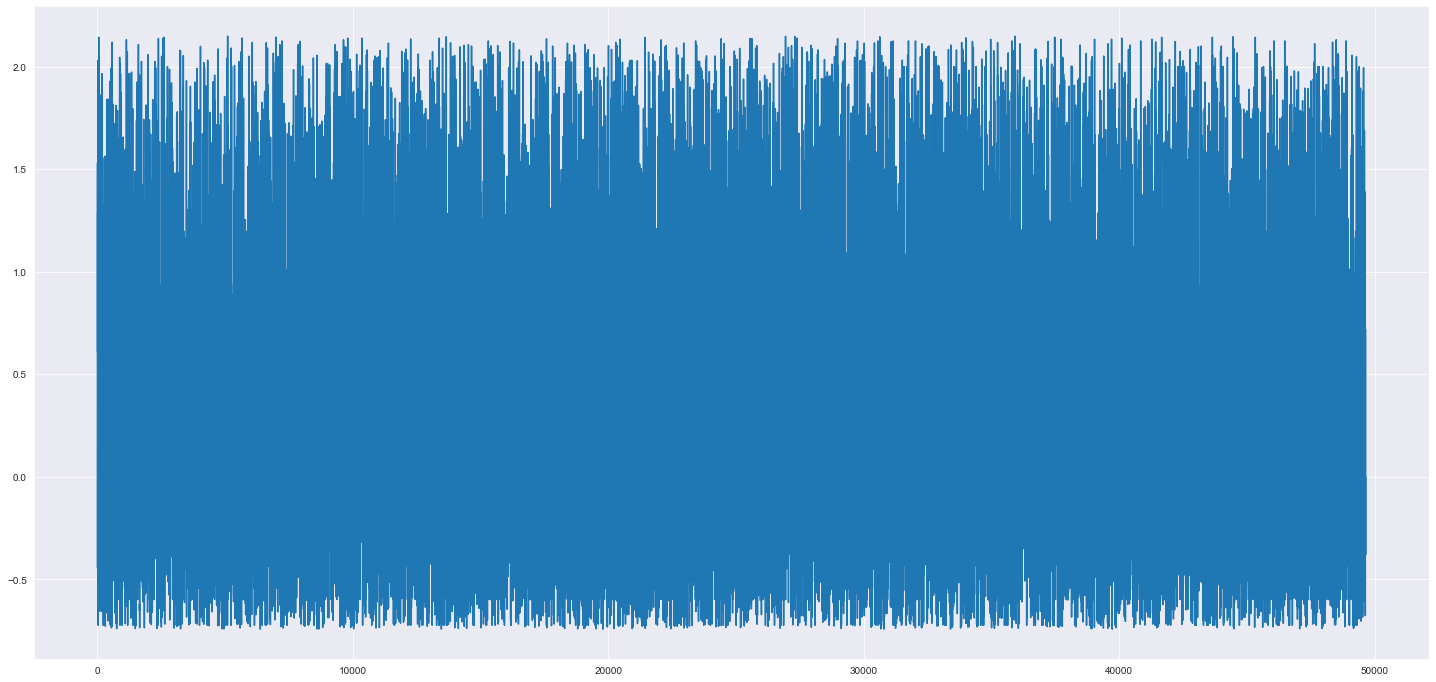

In [33]:
df.PED_hour.plot(figsize=(25,12))

<AxesSubplot:>

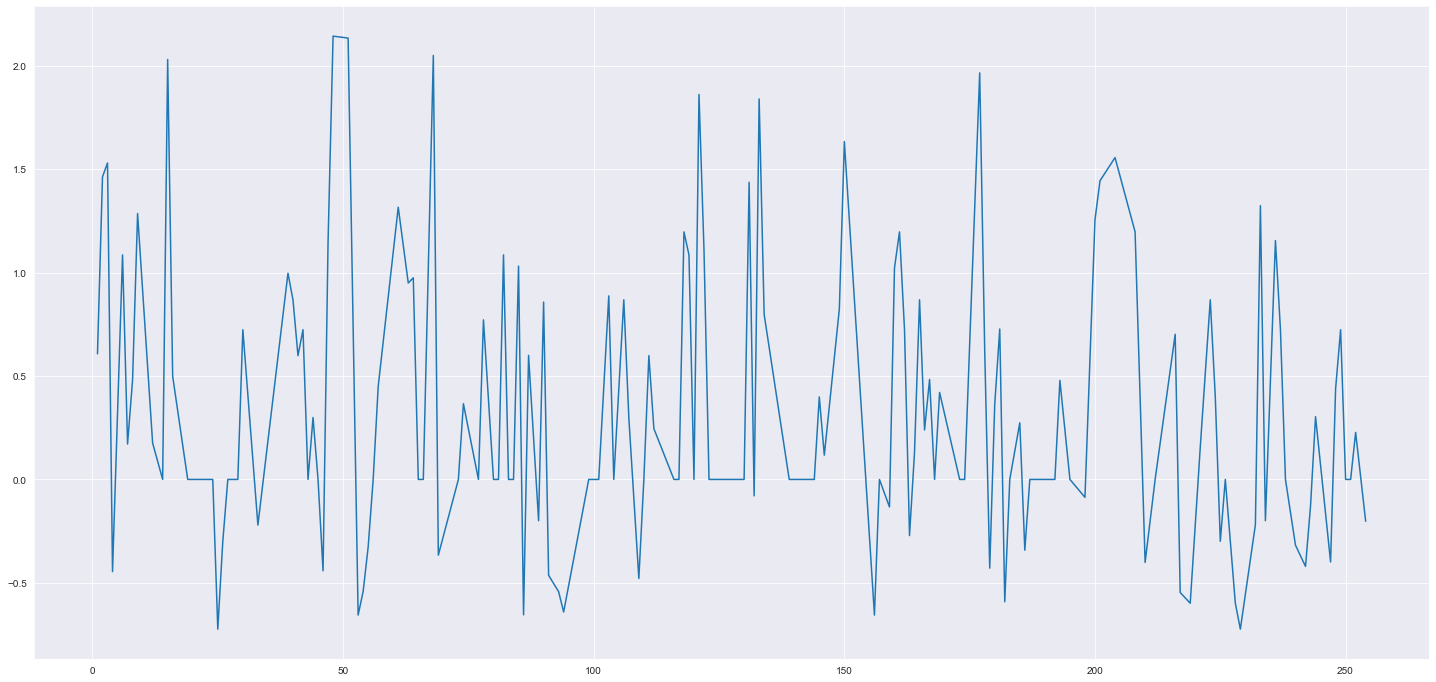

In [34]:
df.PED_hour[:168].plot(figsize=(25,12))

In [35]:
x = df.groupby(['pickup_datetime'])['PED_hour'].mean()

n = 3
#sma 
x.rolling(window=n).mean()

pickup_datetime
2009-01-01 02:00:00             NaN
2009-01-01 03:00:00             NaN
2009-01-01 04:00:00    1.199900e+00
2009-01-01 05:00:00    8.489667e-01
2009-01-01 11:00:00    7.232333e-01
                           ...     
2015-06-30 17:00:00    1.184238e-15
2015-06-30 18:00:00    1.184238e-15
2015-06-30 19:00:00    1.184238e-15
2015-06-30 21:00:00   -1.264333e-01
2015-06-30 23:00:00    1.129000e-01
Name: PED_hour, Length: 32569, dtype: float64

<AxesSubplot:xlabel='pickup_datetime'>

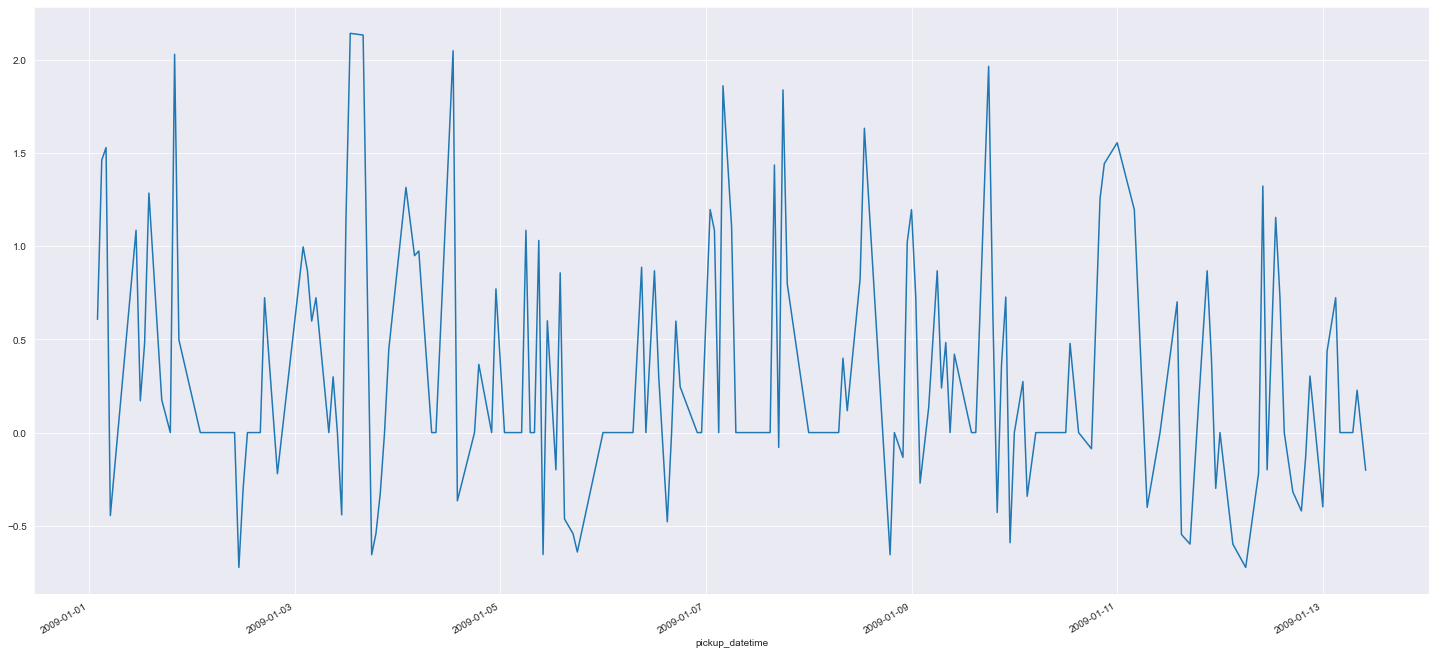

In [36]:
x[:168].plot(figsize=(25,12))

---

### **Initial Feature Engineering**

In [37]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).dt.tz_localize(None)
print((df.pickup_datetime.dtype))

datetime64[ns]


In [38]:
df['Label_Hour'] = df['pickup_datetime'].dt.hour
df['Label_Date'] = df['pickup_datetime'].dt.date
df['pickup_datetime'] = df['pickup_datetime'].dt.floor('H')
df['day_name'] = pd.to_datetime(df['pickup_datetime']).dt.day_name()
df['day_of_the_week'] = pd.to_datetime(df['pickup_datetime']).dt.weekday

In [39]:
df = df[(np.abs(stats.zscore(df['passenger_count'])) < 2)]
df = df[(np.abs(stats.zscore(df['fare_amount'])) < 2)]
df

,pickup_datetime,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change,PED_hour,Label_Hour,Label_Date,day_name,day_of_the_week
1,2009-01-01 02:00:00,1.8000,8.9800,-0.1000,-0.1647,0.6073,2,2009-01-01,Thursday,3
3,2009-01-01 04:00:00,1.2500,9.8000,-0.6875,-0.4494,1.5297,4,2009-01-01,Thursday,3
4,2009-01-01 05:00:00,1.0000,14.2000,-0.2000,0.4490,-0.4455,5,2009-01-01,Thursday,3
6,2009-01-01 11:00:00,1.0000,4.5000,-0.5000,-0.4606,1.0855,11,2009-01-01,Thursday,3
7,2009-01-01 12:00:00,1.1429,8.7857,0.1429,0.8356,0.1710,12,2009-01-01,Thursday,3
...,...,...,...,...,...,...,...,...,...,...
49630,2015-06-30 12:00:00,1.0000,10.0000,0.0000,-0.1304,-0.0000,12,2015-06-30,Tuesday,1
49631,2015-06-30 13:00:00,1.0000,13.0000,0.0000,0.3000,0.0000,13,2015-06-30,Tuesday,1
49635,2015-06-30 17:00:00,1.0000,15.5000,0.0000,0.6757,0.0000,17,2015-06-30,Tuesday,1
49636,2015-06-30 18:00:00,1.0000,11.8750,0.0000,-0.2339,-0.0000,18,2015-06-30,Tuesday,1


In [40]:
select_cols = ['pickup_datetime', 'fare_amount', 'passenger_count','Label_Date']
# Group the demand and price data by day using the pickup_datetime column to extract the date, and then use the pandas groupby() function to group the data by date.
dfh = df[select_cols].groupby('pickup_datetime').agg({'passenger_count':'mean','fare_amount':'mean'}).reset_index()
dfd = df[select_cols].groupby(['Label_Date'])['passenger_count','fare_amount'].agg({'passenger_count':'mean','fare_amount':'mean'}).reset_index()

display(dfh.describe(), dfd.describe())

C:\Users\delst\AppData\Local\Temp/ipykernel_56600/3314034989.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfd = df[select_cols].groupby(['Label_Date'])['passenger_count','fare_amount'].agg({'passenger_count':'mean','fare_amount':'mean'}).reset_index()


,passenger_count,fare_amount
count,29276.000000,29276.000000
mean,1.160959,9.316611
std,0.227113,3.116578
min,0.666700,2.500000
25%,1.000000,7.000000
50%,1.000000,8.900000
75%,1.333300,11.300000
max,1.875000,17.800000


,passenger_count,fare_amount
count,2372.000000,2372.000000
mean,1.162758,9.309310
std,0.080429,1.028480
min,0.962421,5.330670
25%,1.104166,8.605923
50%,1.154761,9.270575
75%,1.211933,9.987985
max,1.507143,13.998617


In [41]:
dfh['passenger_count_pct_change'] = dfh['passenger_count'].pct_change()
dfh['fare_amount_pct_change'] = dfh['fare_amount'].pct_change()

dfd['passenger_count_pct_change'] = dfd['passenger_count'].pct_change()
dfd['fare_amount_pct_change'] = dfd['fare_amount'].pct_change()

display(dfh.describe(), dfd.describe())

,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change
count,29276.000000,29276.000000,29275.000000,29275.000000
mean,1.160959,9.316611,0.026537,0.127885
std,0.227113,3.116578,0.239108,0.575222
min,0.666700,2.500000,-0.619029,-0.855491
25%,1.000000,7.000000,-0.100018,-0.302146
50%,1.000000,8.900000,0.000000,0.008127
75%,1.333300,11.300000,0.111133,0.437500
max,1.875000,17.800000,1.499925,6.000000


,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change
count,2372.000000,2372.000000,2371.000000,2371.000000
mean,1.162758,9.309310,0.004031,0.008660
std,0.080429,1.028480,0.091371,0.132587
min,0.962421,5.330670,-0.336493,-0.492997
25%,1.104166,8.605923,-0.055764,-0.080666
50%,1.154761,9.270575,-0.000993,0.000571
75%,1.211933,9.987985,0.060071,0.088177
max,1.507143,13.998617,0.370130,0.727745


In [42]:
n_day = 24
n_week = 24*7
# n_month = 24*7*4
# n_quart = 24*7*4*3
dfg = df[select_cols].groupby('pickup_datetime').agg({'passenger_count':'mean','fare_amount':'mean'}).reset_index()

dfg['passenger_count_sma_day'] = dfg['passenger_count'].rolling(window=n_day).mean()
dfg['fare_amount_sma_day'] = dfg['fare_amount'].rolling(window=n_day).mean()

dfg['passenger_count_sma_week'] = dfg['passenger_count'].rolling(window=n_week).mean()
dfg['fare_amount_sma_week'] = dfg['fare_amount'].rolling(window=n_week).mean()

# dfg['passenger_count_sma_month'] = dfg['passenger_count'].rolling(window=n_month).mean()
# dfg['fare_amount_sma_month'] = dfg['fare_amount'].rolling(window=n_month).mean()

# dfg['passenger_count_sma_quart'] = dfg['passenger_count'].rolling(window=n_quart).mean()
# dfg['fare_amount_sma_quart'] = dfg['fare_amount'].rolling(window=n_quart).mean()

In [43]:
dfg

,pickup_datetime,passenger_count,fare_amount,passenger_count_sma_day,fare_amount_sma_day,passenger_count_sma_week,fare_amount_sma_week
0,2009-01-01 02:00:00,1.8000,8.9800,NaN,NaN,NaN,NaN
1,2009-01-01 04:00:00,1.2500,9.8000,NaN,NaN,NaN,NaN
2,2009-01-01 05:00:00,1.0000,14.2000,NaN,NaN,NaN,NaN
3,2009-01-01 11:00:00,1.0000,4.5000,NaN,NaN,NaN,NaN
4,2009-01-01 12:00:00,1.1429,8.7857,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
29271,2015-06-30 12:00:00,1.0000,10.0000,1.121179,9.410279,1.140851,9.980072
29272,2015-06-30 13:00:00,1.0000,13.0000,1.121179,9.446737,1.138867,9.987017
29273,2015-06-30 17:00:00,1.0000,15.5000,1.121179,9.905071,1.138867,10.040588
29274,2015-06-30 18:00:00,1.0000,11.8750,1.110763,10.123821,1.138867,10.072582


---

### **Data Cleaning**

In [44]:
dfg_preclean = len(dfg)
dfg.isna().sum()

pickup_datetime               0
passenger_count               0
fare_amount                   0
passenger_count_sma_day      23
fare_amount_sma_day          23
passenger_count_sma_week    167
fare_amount_sma_week        167
dtype: int64

In [45]:
# Fill NANs
perc_NaN = (1-(167/len(dfg)))
dfg = dfg.iloc[167:,:]
dfg.columns

Index(['pickup_datetime', 'passenger_count', 'fare_amount',
       'passenger_count_sma_day', 'fare_amount_sma_day',
       'passenger_count_sma_week', 'fare_amount_sma_week'],
      dtype='object')

In [46]:
#Remove Outeliers
cols = ['passenger_count', 'fare_amount',
       'passenger_count_sma_day', 'fare_amount_sma_day',
       'passenger_count_sma_week', 'fare_amount_sma_week']
    #    'passenger_count_sma_month', 'fare_amount_sma_month',
    #    'passenger_count_sma_quart', 'fare_amount_sma_quart']

dfg2 = dfg[(np.abs(stats.zscore(dfg[cols])) < 3).all(axis=1)]
perc_outliers = (len(dfg2)/len(dfg))
dfg2

,pickup_datetime,passenger_count,fare_amount,passenger_count_sma_day,fare_amount_sma_day,passenger_count_sma_week,fare_amount_sma_week
167,2009-01-14 07:00:00,1.0,7.4333,1.166538,8.731125,1.174813,8.523737
168,2009-01-14 09:00:00,1.0,10.4000,1.145704,8.711679,1.170051,8.532189
169,2009-01-14 10:00:00,1.0,6.9800,1.131817,8.496958,1.168562,8.515404
170,2009-01-14 11:00:00,1.0,10.5000,1.110983,8.284458,1.168562,8.493380
171,2009-01-14 12:00:00,1.0,9.8929,1.110983,8.504996,1.168562,8.525480
...,...,...,...,...,...,...,...
29271,2015-06-30 12:00:00,1.0,10.0000,1.121179,9.410279,1.140851,9.980072
29272,2015-06-30 13:00:00,1.0,13.0000,1.121179,9.446737,1.138867,9.987017
29273,2015-06-30 17:00:00,1.0,15.5000,1.121179,9.905071,1.138867,10.040588
29274,2015-06-30 18:00:00,1.0,11.8750,1.110763,10.123821,1.138867,10.072582


In [47]:
dfg2.describe()

,passenger_count,fare_amount,passenger_count_sma_day,fare_amount_sma_day,passenger_count_sma_week,fare_amount_sma_week
count,28859.000000,28859.000000,28859.000000,28859.000000,28859.000000,28859.000000
mean,1.158999,9.319531,1.159643,9.319586,1.160678,9.317861
std,0.225077,3.114392,0.058042,0.814810,0.023334,0.600975
min,0.666700,2.500000,0.985721,6.876083,1.096214,7.912295
25%,1.000000,7.000000,1.117358,8.732244,1.143768,8.814081
50%,1.000000,8.900000,1.155904,9.271758,1.160179,9.162400
75%,1.333300,11.300000,1.197085,9.915648,1.176550,9.907908
max,1.833300,17.800000,1.340629,11.760417,1.231517,10.561083


In [48]:
print('The percentage of data kept after NaN cleaning:', round(perc_NaN,3))
print('The percentage of data kept after Outlier cleaning:', round(perc_outliers,3))
print('The percentage of data kept after Data Cleaning:', round(len(dfg2)/dfg_preclean,3))

The percentage of data kept after NaN cleaning: 0.994
The percentage of data kept after Outlier cleaning: 0.991
The percentage of data kept after Data Cleaning: 0.986


---

### **Final Feature Engineering**

In [49]:
dfg2.columns

Index(['pickup_datetime', 'passenger_count', 'fare_amount',
       'passenger_count_sma_day', 'fare_amount_sma_day',
       'passenger_count_sma_week', 'fare_amount_sma_week'],
      dtype='object')

In [50]:
cols = ['passenger_count', 'fare_amount',
        'passenger_count_sma_day', 'fare_amount_sma_day',
        'passenger_count_sma_week', 'fare_amount_sma_week']
    #    'passenger_count_sma_month', 'fare_amount_sma_month',
    #    'passenger_count_sma_quart', 'fare_amount_sma_quart']

# use the apply() function with a lambda function to iterate through the column names and create new columns
for col in cols:
    dfg2[col + '_pct_change'] = dfg2[col].pct_change()

dfg2

,pickup_datetime,passenger_count,fare_amount,passenger_count_sma_day,fare_amount_sma_day,passenger_count_sma_week,fare_amount_sma_week,passenger_count_pct_change,fare_amount_pct_change,passenger_count_sma_day_pct_change,fare_amount_sma_day_pct_change,passenger_count_sma_week_pct_change,fare_amount_sma_week_pct_change
167,2009-01-14 07:00:00,1.0,7.4333,1.166538,8.731125,1.174813,8.523737,NaN,NaN,NaN,NaN,NaN,NaN
168,2009-01-14 09:00:00,1.0,10.4000,1.145704,8.711679,1.170051,8.532189,0.0,0.399109,-0.017859,-0.002227,-0.004053,0.000992
169,2009-01-14 10:00:00,1.0,6.9800,1.131817,8.496958,1.168562,8.515404,0.0,-0.328846,-0.012121,-0.024647,-0.001272,-0.001967
170,2009-01-14 11:00:00,1.0,10.5000,1.110983,8.284458,1.168562,8.493380,0.0,0.504298,-0.018407,-0.025009,0.000000,-0.002586
171,2009-01-14 12:00:00,1.0,9.8929,1.110983,8.504996,1.168562,8.525480,0.0,-0.057819,0.000000,0.026621,0.000000,0.003779
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29271,2015-06-30 12:00:00,1.0,10.0000,1.121179,9.410279,1.140851,9.980072,0.0,-0.130435,0.000000,-0.021659,0.000000,-0.000298
29272,2015-06-30 13:00:00,1.0,13.0000,1.121179,9.446737,1.138867,9.987017,0.0,0.300000,0.000000,0.003874,-0.001739,0.000696
29273,2015-06-30 17:00:00,1.0,15.5000,1.121179,9.905071,1.138867,10.040588,0.0,0.192308,0.000000,0.048518,0.000000,0.005364
29274,2015-06-30 18:00:00,1.0,11.8750,1.110763,10.123821,1.138867,10.072582,0.0,-0.233871,-0.009291,0.022085,0.000000,0.003186


In [51]:
dfg2.describe()

,passenger_count,fare_amount,passenger_count_sma_day,fare_amount_sma_day,passenger_count_sma_week,fare_amount_sma_week,passenger_count_pct_change,fare_amount_pct_change,passenger_count_sma_day_pct_change,fare_amount_sma_day_pct_change,passenger_count_sma_week_pct_change,fare_amount_sma_week_pct_change
count,28859.000000,28859.000000,28859.000000,28859.000000,28859.000000,28859.000000,28858.000000,28858.000000,28858.000000,28858.000000,2.885800e+04,28858.000000
mean,1.158999,9.319531,1.159643,9.319586,1.160678,9.317861,0.026301,0.127786,0.000065,0.000197,2.788404e-07,0.000010
std,0.225077,3.114392,0.058042,0.814810,0.023334,0.600975,0.237885,0.574978,0.011550,0.019591,1.646685e-03,0.002778
min,0.666700,2.500000,0.985721,6.876083,1.096214,7.912295,-0.619029,-0.855491,-0.066815,-0.091544,-1.403143e-02,-0.015995
25%,1.000000,7.000000,1.117358,8.732244,1.143768,8.814081,-0.100018,-0.302177,-0.007070,-0.012822,-1.009993e-03,-0.001852
50%,1.000000,8.900000,1.155904,9.271758,1.160179,9.162400,0.000000,0.008253,0.000000,0.000000,0.000000e+00,0.000000
75%,1.333300,11.300000,1.197085,9.915648,1.176550,9.907908,0.111133,0.437193,0.007099,0.013029,1.003772e-03,0.001843
max,1.833300,17.800000,1.340629,11.760417,1.231517,10.561083,1.499925,6.000000,0.057790,0.092367,1.587434e-02,0.014869


In [52]:
threshold = dfg2.fare_amount_sma_day_pct_change.quantile(0.25)

cols = ['fare_amount','fare_amount_sma_day_pct_change','fare_amount_sma_week_pct_change']
#        'fare_amount_sma_month_pct_change','fare_amount_sma_quart_pct_change']

# replace all values below the threshold with the threshold value
dfg2[cols] = dfg2[cols].apply(lambda x: x.where(x > threshold, threshold))

In [53]:
dfg2['PED_hour'] = (dfg2.passenger_count_pct_change / dfg2.fare_amount_pct_change)
dfg2['PED_day'] = (dfg2.passenger_count_sma_day_pct_change / dfg2.fare_amount_sma_day_pct_change)
dfg2['PED_week'] = (dfg2.passenger_count_sma_week_pct_change / dfg2.fare_amount_sma_week_pct_change)
# dfg2['PED_Month'] = (dfg2.passenger_count_sma_month_pct_change / dfg2.fare_amount_sma_month_pct_change)
# dfg2['PED_Quart'] = (dfg2.passenger_count_sma_quart_pct_change / dfg2.fare_amount_sma_quart_pct_change)

dfg2 = dfg2.iloc[1:,:].round(2)
dfg2

,pickup_datetime,passenger_count,fare_amount,passenger_count_sma_day,fare_amount_sma_day,passenger_count_sma_week,fare_amount_sma_week,passenger_count_pct_change,fare_amount_pct_change,passenger_count_sma_day_pct_change,fare_amount_sma_day_pct_change,passenger_count_sma_week_pct_change,fare_amount_sma_week_pct_change,PED_hour,PED_day,PED_week
168,2009-01-14 09:00:00,1.0,10.40,1.15,8.71,1.17,8.53,0.0,0.40,-0.02,-0.00,-0.0,0.00,0.00,8.02,-4.09
169,2009-01-14 10:00:00,1.0,6.98,1.13,8.50,1.17,8.52,0.0,-0.33,-0.01,-0.01,-0.0,-0.00,-0.00,0.95,0.65
170,2009-01-14 11:00:00,1.0,10.50,1.11,8.28,1.17,8.49,0.0,0.50,-0.02,-0.01,0.0,-0.00,0.00,1.44,-0.00
171,2009-01-14 12:00:00,1.0,9.89,1.11,8.50,1.17,8.53,0.0,-0.06,0.00,0.03,0.0,0.00,-0.00,0.00,0.00
172,2009-01-14 16:00:00,1.5,9.20,1.13,8.63,1.17,8.53,0.5,-0.07,0.02,0.01,0.0,0.00,-7.14,1.28,6.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29271,2015-06-30 12:00:00,1.0,10.00,1.12,9.41,1.14,9.98,0.0,-0.13,0.00,-0.01,0.0,-0.00,-0.00,-0.00,-0.00
29272,2015-06-30 13:00:00,1.0,13.00,1.12,9.45,1.14,9.99,0.0,0.30,0.00,0.00,-0.0,0.00,0.00,0.00,-2.50
29273,2015-06-30 17:00:00,1.0,15.50,1.12,9.91,1.14,10.04,0.0,0.19,0.00,0.05,0.0,0.01,0.00,0.00,0.00
29274,2015-06-30 18:00:00,1.0,11.88,1.11,10.12,1.14,10.07,0.0,-0.23,-0.01,0.02,0.0,0.00,-0.00,-0.42,0.00


In [54]:
dfg2.replace([np.inf, -np.inf], np.nan, inplace=True)
dfg2.bfill(inplace=True)
dfg2.describe().round(2)

,passenger_count,fare_amount,passenger_count_sma_day,fare_amount_sma_day,passenger_count_sma_week,fare_amount_sma_week,passenger_count_pct_change,fare_amount_pct_change,passenger_count_sma_day_pct_change,fare_amount_sma_day_pct_change,passenger_count_sma_week_pct_change,fare_amount_sma_week_pct_change,PED_hour,PED_day,PED_week
count,28858.00,28858.00,28858.00,28858.00,28858.00,28858.00,28858.00,28858.00,28858.00,28858.00,28858.00,28858.00,28858.00,2.885800e+04,2.885800e+04
mean,1.16,9.32,1.16,9.32,1.16,9.32,0.03,0.13,0.00,0.00,0.00,0.00,0.15,4.325466e+09,-1.168167e+08
std,0.23,3.11,0.06,0.81,0.02,0.60,0.24,0.57,0.01,0.02,0.00,0.00,4.14,1.894522e+12,1.931151e+11
min,0.67,2.50,0.99,6.88,1.10,7.91,-0.62,-0.86,-0.07,-0.01,-0.01,-0.01,-264.60,-1.174770e+14,-1.342129e+13
25%,1.00,7.00,1.12,8.73,1.14,8.81,-0.10,-0.30,-0.01,-0.01,0.00,0.00,0.00,-1.500000e-01,0.000000e+00
50%,1.00,8.90,1.16,9.27,1.16,9.16,0.00,0.01,0.00,0.00,0.00,-0.00,0.00,0.000000e+00,0.000000e+00
75%,1.33,11.30,1.20,9.92,1.18,9.91,0.11,0.44,0.01,0.01,0.00,0.00,0.51,7.500000e-01,6.100000e-01
max,1.83,17.80,1.34,11.76,1.23,10.56,1.50,6.00,0.06,0.09,0.02,0.01,148.50,1.072841e+14,1.158145e+13


In [55]:
cols = ['PED_day','PED_week'] # 'PED_Month', 'PED_Quart']

dfg3 = dfg2[(np.abs(stats.zscore(dfg2[cols])) < 2).all(axis=1)]
print(len(dfg3)/len(dfg2))
dfg3

0.9987178598655485


,pickup_datetime,passenger_count,fare_amount,passenger_count_sma_day,fare_amount_sma_day,passenger_count_sma_week,fare_amount_sma_week,passenger_count_pct_change,fare_amount_pct_change,passenger_count_sma_day_pct_change,fare_amount_sma_day_pct_change,passenger_count_sma_week_pct_change,fare_amount_sma_week_pct_change,PED_hour,PED_day,PED_week
168,2009-01-14 09:00:00,1.0,10.40,1.15,8.71,1.17,8.53,0.0,0.40,-0.02,-0.00,-0.0,0.00,0.00,8.02,-4.09
169,2009-01-14 10:00:00,1.0,6.98,1.13,8.50,1.17,8.52,0.0,-0.33,-0.01,-0.01,-0.0,-0.00,-0.00,0.95,0.65
170,2009-01-14 11:00:00,1.0,10.50,1.11,8.28,1.17,8.49,0.0,0.50,-0.02,-0.01,0.0,-0.00,0.00,1.44,-0.00
171,2009-01-14 12:00:00,1.0,9.89,1.11,8.50,1.17,8.53,0.0,-0.06,0.00,0.03,0.0,0.00,-0.00,0.00,0.00
172,2009-01-14 16:00:00,1.5,9.20,1.13,8.63,1.17,8.53,0.5,-0.07,0.02,0.01,0.0,0.00,-7.14,1.28,6.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29271,2015-06-30 12:00:00,1.0,10.00,1.12,9.41,1.14,9.98,0.0,-0.13,0.00,-0.01,0.0,-0.00,-0.00,-0.00,-0.00
29272,2015-06-30 13:00:00,1.0,13.00,1.12,9.45,1.14,9.99,0.0,0.30,0.00,0.00,-0.0,0.00,0.00,0.00,-2.50
29273,2015-06-30 17:00:00,1.0,15.50,1.12,9.91,1.14,10.04,0.0,0.19,0.00,0.05,0.0,0.01,0.00,0.00,0.00
29274,2015-06-30 18:00:00,1.0,11.88,1.11,10.12,1.14,10.07,0.0,-0.23,-0.01,0.02,0.0,0.00,-0.00,-0.42,0.00


In [56]:
dfg3.describe()

,passenger_count,fare_amount,passenger_count_sma_day,fare_amount_sma_day,passenger_count_sma_week,fare_amount_sma_week,passenger_count_pct_change,fare_amount_pct_change,passenger_count_sma_day_pct_change,fare_amount_sma_day_pct_change,passenger_count_sma_week_pct_change,fare_amount_sma_week_pct_change,PED_hour,PED_day,PED_week
count,28821.000000,28821.000000,28821.000000,28821.000000,28821.000000,28821.000000,28821.000000,28821.000000,28821.000000,28821.000000,28821.000000,28821.000000,28821.000000,28821.000000,28821.000000
mean,1.158835,9.320835,1.159646,9.320009,1.160666,9.318316,0.026236,0.127919,0.000067,0.003843,0.000008,0.000029,0.149236,0.145226,0.188829
std,0.225105,3.115659,0.058109,0.815012,0.023515,0.601072,0.237851,0.575092,0.011917,0.015108,0.000328,0.002746,4.127434,27.620749,8.187075
min,0.670000,2.500000,0.990000,6.880000,1.100000,7.910000,-0.620000,-0.860000,-0.070000,-0.010000,-0.010000,-0.010000,-264.600000,-2687.760000,-363.080000
25%,1.000000,7.000000,1.120000,8.730000,1.140000,8.810000,-0.100000,-0.300000,-0.010000,-0.010000,0.000000,0.000000,0.000000,-0.140000,0.000000
50%,1.000000,8.900000,1.160000,9.270000,1.160000,9.160000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.330000,11.300000,1.200000,9.920000,1.180000,9.910000,0.110000,0.440000,0.010000,0.010000,0.000000,0.000000,0.510000,0.750000,0.610000
max,1.830000,17.800000,1.340000,11.760000,1.230000,10.560000,1.500000,6.000000,0.060000,0.090000,0.020000,0.010000,148.500000,3353.260000,470.820000


In [57]:
x = dfg3.groupby(['pickup_datetime'])['PED_hour'].mean()

n = 2  #*7*4*3
#sma = 
x.rolling(window=n).mean()

pickup_datetime
2009-01-14 09:00:00     NaN
2009-01-14 10:00:00    0.00
2009-01-14 11:00:00    0.00
2009-01-14 12:00:00    0.00
2009-01-14 16:00:00   -3.57
                       ... 
2015-06-30 12:00:00    0.00
2015-06-30 13:00:00    0.00
2015-06-30 17:00:00    0.00
2015-06-30 18:00:00    0.00
2015-06-30 19:00:00    0.00
Name: PED_hour, Length: 28821, dtype: float64

In [58]:
x.isna().sum()

0

<AxesSubplot:xlabel='pickup_datetime'>

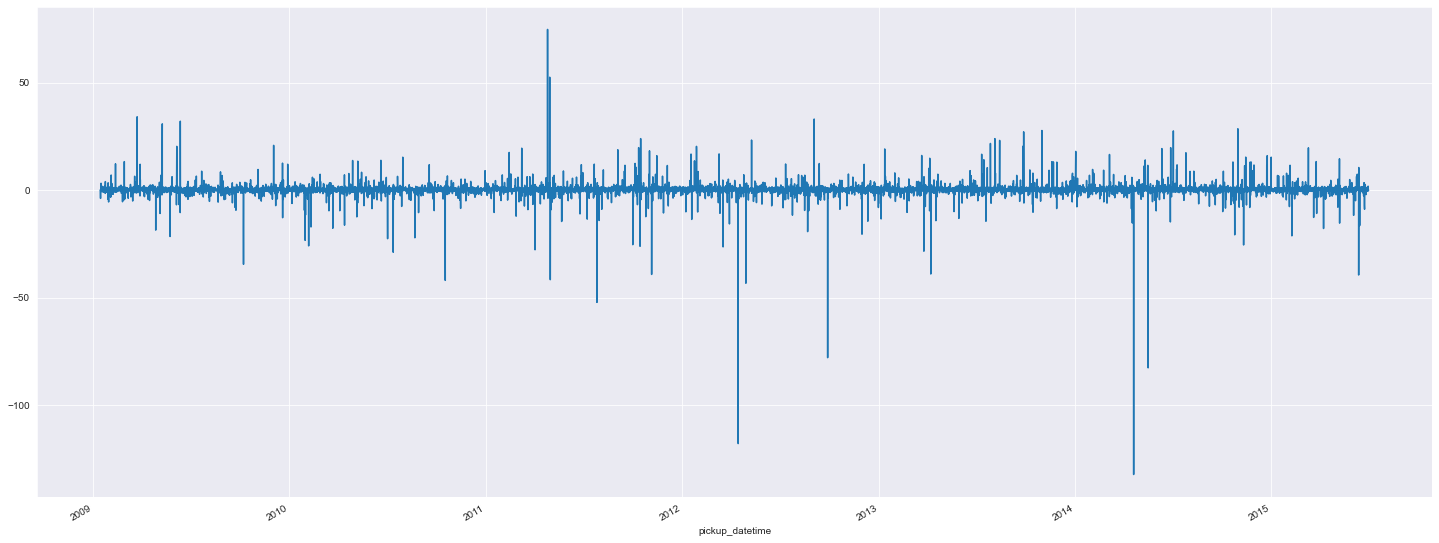

In [59]:
(x.rolling(window=n).mean()).plot(figsize=(25,10))

<AxesSubplot:xlabel='pickup_datetime'>

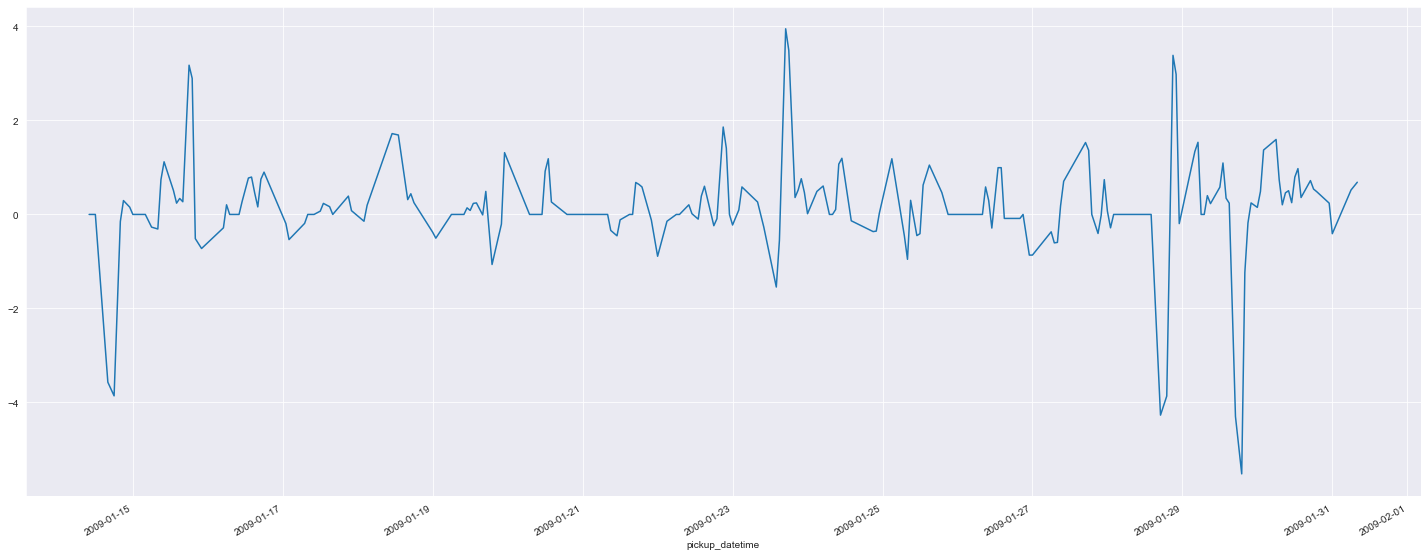

In [60]:
(x[:208].rolling(window=n).mean()).plot(figsize=(25,10))

---

In [61]:
dfg3

,pickup_datetime,passenger_count,fare_amount,passenger_count_sma_day,fare_amount_sma_day,passenger_count_sma_week,fare_amount_sma_week,passenger_count_pct_change,fare_amount_pct_change,passenger_count_sma_day_pct_change,fare_amount_sma_day_pct_change,passenger_count_sma_week_pct_change,fare_amount_sma_week_pct_change,PED_hour,PED_day,PED_week
168,2009-01-14 09:00:00,1.0,10.40,1.15,8.71,1.17,8.53,0.0,0.40,-0.02,-0.00,-0.0,0.00,0.00,8.02,-4.09
169,2009-01-14 10:00:00,1.0,6.98,1.13,8.50,1.17,8.52,0.0,-0.33,-0.01,-0.01,-0.0,-0.00,-0.00,0.95,0.65
170,2009-01-14 11:00:00,1.0,10.50,1.11,8.28,1.17,8.49,0.0,0.50,-0.02,-0.01,0.0,-0.00,0.00,1.44,-0.00
171,2009-01-14 12:00:00,1.0,9.89,1.11,8.50,1.17,8.53,0.0,-0.06,0.00,0.03,0.0,0.00,-0.00,0.00,0.00
172,2009-01-14 16:00:00,1.5,9.20,1.13,8.63,1.17,8.53,0.5,-0.07,0.02,0.01,0.0,0.00,-7.14,1.28,6.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29271,2015-06-30 12:00:00,1.0,10.00,1.12,9.41,1.14,9.98,0.0,-0.13,0.00,-0.01,0.0,-0.00,-0.00,-0.00,-0.00
29272,2015-06-30 13:00:00,1.0,13.00,1.12,9.45,1.14,9.99,0.0,0.30,0.00,0.00,-0.0,0.00,0.00,0.00,-2.50
29273,2015-06-30 17:00:00,1.0,15.50,1.12,9.91,1.14,10.04,0.0,0.19,0.00,0.05,0.0,0.01,0.00,0.00,0.00
29274,2015-06-30 18:00:00,1.0,11.88,1.11,10.12,1.14,10.07,0.0,-0.23,-0.01,0.02,0.0,0.00,-0.00,-0.42,0.00


In [62]:
def smoothed_by_time(df, time_period:str, PED_col:str, rolling_window:int, n_std:int):
    
    dfs = df.groupby(df['pickup_datetime'].dt.to_period(time_period))[PED_col].mean()
    dfs = pd.DataFrame(dfs.to_numpy(), columns=[PED_col])
    
    dfs = dfs.fillna(method='bfill')
    dfs = dfs[(np.abs(stats.zscore(dfs[PED_col])) < n_std)]
    return dfs

time_period = ['D', 'W']
PED_col = ['PED_day', 'PED_week']
rolling_window = [24, 24*7]
std = 3

dfsd = smoothed_by_time(dfg3, time_period[0], PED_col[0], rolling_window[0], std)
dfsw = smoothed_by_time(dfg3, time_period[1], PED_col[1], rolling_window[1], std)
# df_store = [smoothed_by_time(dfg3, time_period[i], PED_col[i], rolling_window[i], std) for i in range(len(time_period))]

<AxesSubplot:>

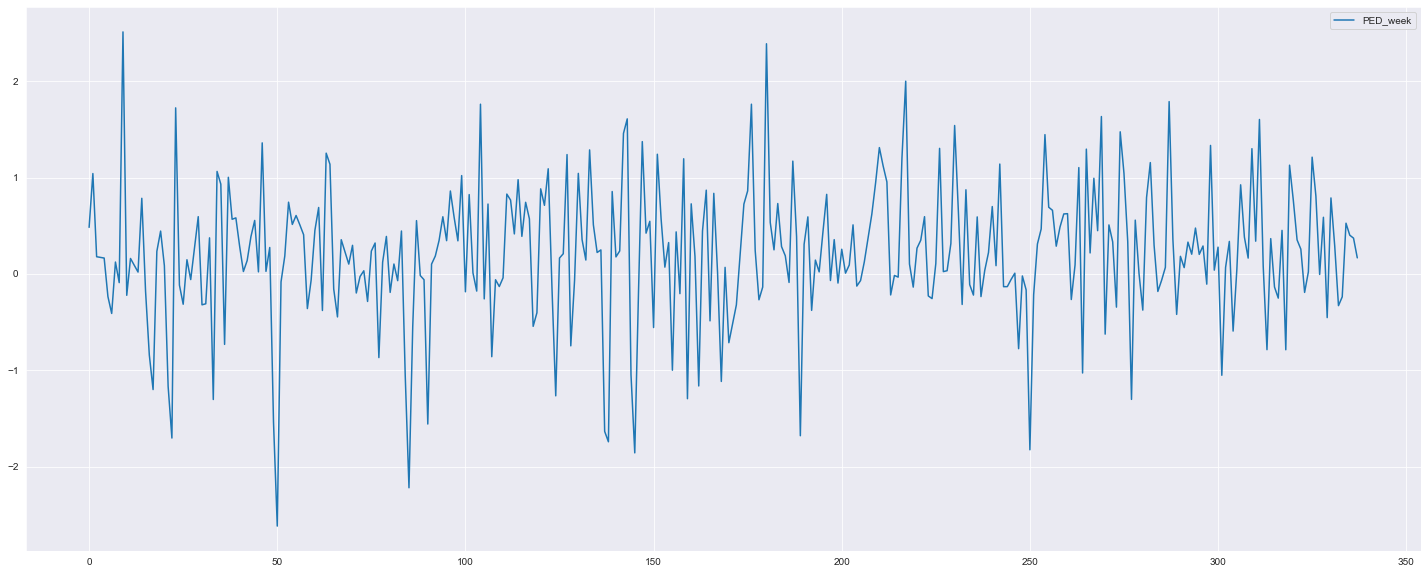

In [63]:
dfsw.plot(figsize=(25,10))

In [64]:
print(len(dfsd), len(dfsw))
display(dfsd.head(), dfsw.head())

2352 332


,PED_day
0,9.430000
1,0.371333
2,0.728462
3,0.014167
4,-1.957143


,PED_week
0,0.482857
1,1.041205
2,0.178313
4,0.164681
5,-0.235256


<AxesSubplot:>

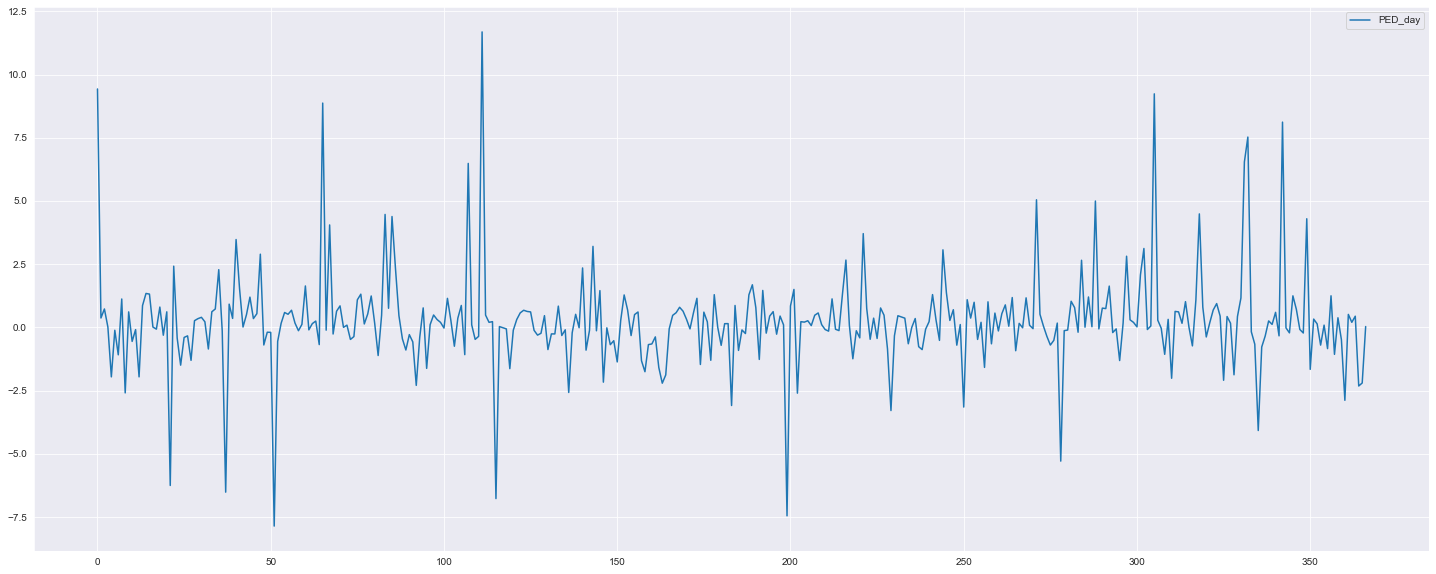

In [65]:
(dfsd[:365]).plot(figsize=(25,10))

<AxesSubplot:>

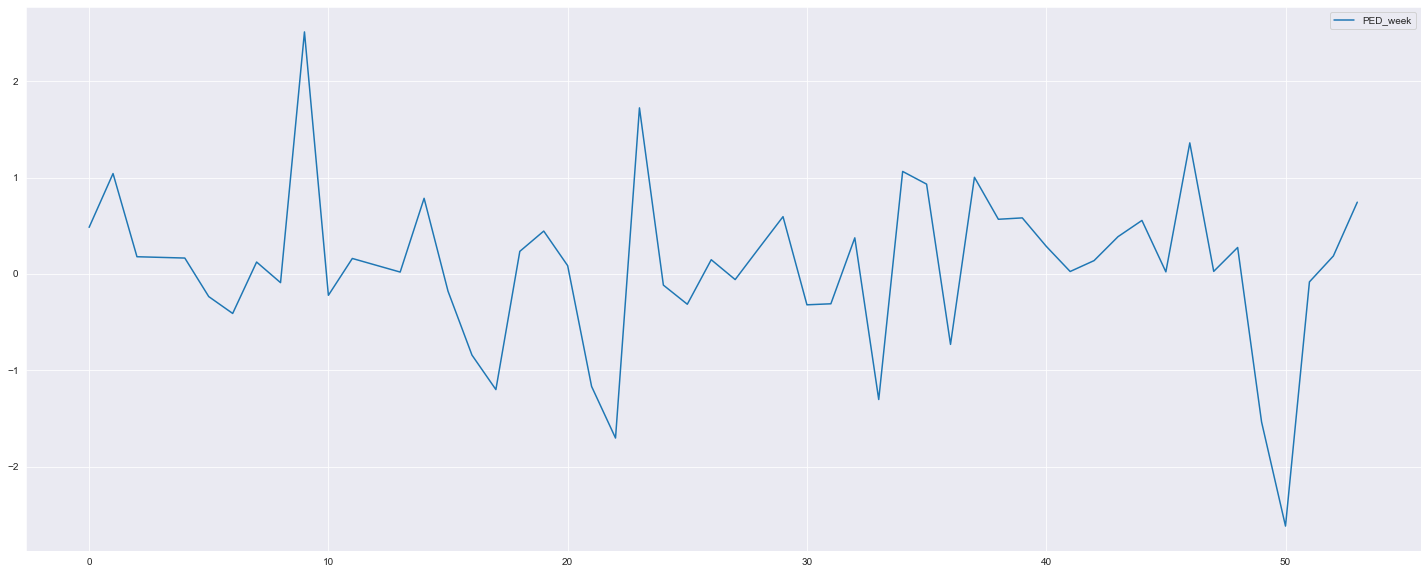

In [66]:
(dfsw[:52]).plot(figsize=(25,10))

In [67]:
# df['ride_pickup_datetime'] = pd.to_datetime(df['ride_pickup_datetime'])
# df['hour'] = df['ride_pickup_datetime'].dt.hour
# grouped = df.groupby(['hour'])['fare_amount'].mean()

# demand = df.groupby(['hour'])['passenger_count'].sum()

# elasticity = (demand.pct_change() / grouped.pct_change())

In [68]:
x = dfg3.groupby(['pickup_datetime'])['PED_day'].mean()

n = 24
#sma = 
x.rolling(window=n).mean()

pickup_datetime
2009-01-14 09:00:00         NaN
2009-01-14 10:00:00         NaN
2009-01-14 11:00:00         NaN
2009-01-14 12:00:00         NaN
2009-01-14 16:00:00         NaN
                         ...   
2015-06-30 12:00:00    0.177083
2015-06-30 13:00:00    0.177083
2015-06-30 17:00:00    0.177083
2015-06-30 18:00:00    0.187917
2015-06-30 19:00:00    0.244583
Name: PED_day, Length: 28821, dtype: float64

<AxesSubplot:xlabel='pickup_datetime'>

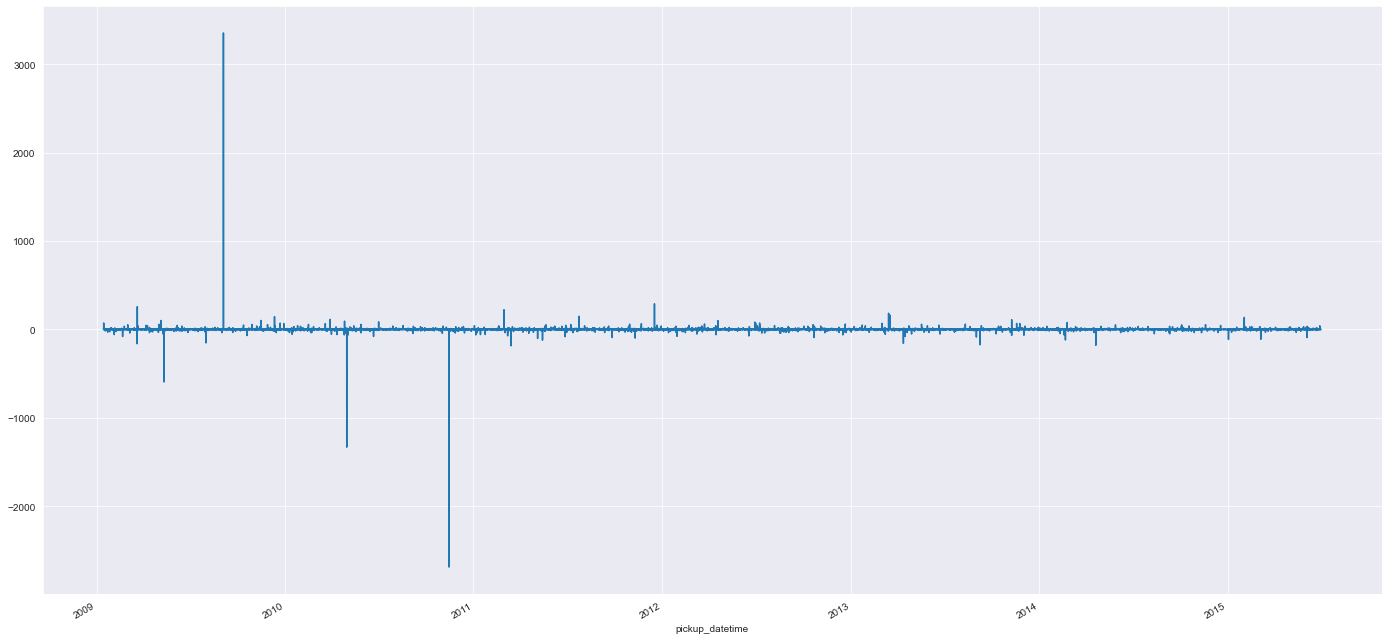

In [69]:
x.plot(figsize=(24,12))